## Siddarth Ganesh - AM.EN.U4CSE17322
All the necessary modules are imported to notebook here.

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import os
import sys
from tqdm import tqdm
import matplotlib.image as mpimg


import cv2

from keras.preprocessing.image import ImageDataGenerator
project_folder = "./"
sys.path.append(project_folder)
os.chdir(project_folder)
print("current Wrokiing directory sucessfully changed to ",os.getcwd())



current Wrokiing directory sucessfully changed to  /home/sid/Documents/ML_Project/SIDDARTH-AM.EN.U4CSE17322


In [2]:
mainpath = os.listdir('trainset/')
mainpath.sort()

new_ds = []
for i in tqdm(mainpath):
    subpath = os.listdir('trainset/'+i)
    subpath.sort()
    for j in subpath:
        p = 'trainset/'+i+"/"+j
        new_ds.append(p)
print(len(new_ds))

100%|██████████| 13/13 [00:00<00:00, 10597.85it/s]

1013


In [3]:
# from mtcnn.mtcnn import MTCNN
# from PIL import Image
# import numpy as np
# import pandas as pd
# def extract_face_from_image (impath): 
#     image =cv2.imread(impath)
#     # convert to RGB, if needed
#     # convert to array
#     image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     # create the detector, using default weights
#     ress = detect_face(image)
#     return ress

# def detect_face(f_arr):
#     detector = MTCNN()
#     # detect faces in the image
#     results = detector.detect_faces(f_arr)
#     if (results):
#         x1, y1, width, height = results[0]['box']
#         # bug fix
        
#         x1, y1 = abs(x1), abs(y1)
#         x2, y2 = x1 + width, y1 + height
#         # extract the face
#         face = f_arr[y1-10:y2+10, x1-10:x2+10]
#         # resize pixels to the model size
#         image = Image.fromarray(face)
#         image = image.resize((200,200))
#         face_array = np.asarray(image)
#         return face_array    
#     else:
#         x1=20
#         y1=50
#         y2=200
#         x2=180
        
#         face = f_arr[y1-10:y2+10, x1-10:x2+10]
#         # resize pixels to the model size
#         image = Image.fromarray(face)
#         image = image.resize((200,200))
#         face_array = np.asarray(image)
#         return face_array
# tf.autograph.experimental.do_not_convert(
#     func=detect_face
# )

In [4]:
!pwd
# os.chdir('../../')

/home/sid/Documents/ML_Project/SIDDARTH-AM.EN.U4CSE17322


# Face detect and crop
Using the ResNet-10 pretrained caffe model for identifying faces and saving it into training and validation.

In [5]:
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('assets/deploy.prototxt.txt', 'assets/res10_300x300_ssd_iter_140000.caffemodel')
print("[INFO] Loaded model...")
# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
def extract_face_from_image(imgpath):
    image = cv2.imread(imgpath)
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the detections and
    # predictions
#     print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()

    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > 0.5:
            # compute the (x, y)-coordinates of the bounding box for the
            # object
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            # draw the bounding box of the face along with the associated
            # probability
            text = "{:.2f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10

    #         cv2.rectangle(image, (startX, startY), (endX, endY),
    #             (0, 0, 255), 2)
#             cv2.putText(image, text, (startX, y),
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
            image = image[startY:endY,startX:endX]
#             image = cv2.resize(image,(200,200))
            return np.asarray(image)
        else:
#             image = cv2.resize(image,(200,200))
            return np.asarray(image)


[INFO] loading model...
[INFO] Loaded model...


## Data augmentation

- Iterate through all images folder by folder subdivided by their ID and split into train and validation data

- Flip images horizontally and apped to train data

In [6]:
classname = []

for i in tqdm(new_ds):
    path_val = i.split('/')
    path_val = path_val[2]
#     print(path_val)
    ind = 1
    ind2 = 1
    
    for j in os.listdir(i): 
#         img = cv2.imread(str(i)+'/'+str(j))
        imm = extract_face_from_image(str(i)+'/'+str(j))
#         print(imm)
#         print(os.getcwd())
        if('script' in j):
            os.chdir('train/')
            path = j.split('_')
            path1 = path[0]+'_'+path[1]
            
            if(path1 not in classname):
                classname.append(path1)
            if(os.path.exists(path1)):
                os.chdir(path1)
#                 im = cv2.resize(img,(200,200))
                cv2.imwrite(str(ind)+'.jpg',imm)
                image = cv2.flip(imm,1)
                cv2.imwrite(str(ind+1)+'.jpg',image)
                os.chdir('../../')
            else:
                os.mkdir(path1)
                os.chdir(path1)
#                 im = cv2.resize(img,(200,200))
                cv2.imwrite(str(ind)+'.jpg',imm)
                image = cv2.flip(imm,1)
                cv2.imwrite(str(ind+1)+'.jpg',image)
                os.chdir('../../')
            
            ind+=2
        else:
#             print(os.listdir(os.getcwd()))
            os.chdir('valid/')
#             print(i)
    
            if(os.path.exists(path_val)):
                os.chdir(path_val)
                
#                 im = cv2.resize(img,(200,200))
                cv2.imwrite(str(ind2)+'.jpg',imm)
#                 cv2.imwrite(str(ind+1)+'.jpg',image)
                
                os.chdir('../../')
            else:
                os.mkdir(path_val)
                os.chdir(path_val)
#                 im = cv2.resize(img,(200,200))
                cv2.imwrite(str(ind2)+'.jpg',imm)
#                 image = cv2.flip(imm,1)
#                 cv2.imwrite(str(ind+1)+'.jpg',image)
                
                os.chdir('../../')
            ind2+=1

100%|██████████| 1013/1013 [01:32<00:00, 10.92it/s]


## Resizing sample images

- All imput images to the model is of shape(3,96,96) it is in channel first format. 
- Save into train and validation folders for applying few shot learning eventually




In [7]:
import cv2 
from tqdm import tqdm
import matplotlib.pyplot as plt

#change the base path to test_images if you want to resize the test_images
basepath = "train/"


#This will resize every image in the images folder to a shape(3,96,96)
for files in tqdm(os.listdir(basepath)):
    var = os.path.join(basepath,files)
    if os.path.isfile(os.path.join(var,'1.jpg')):
        imgpath = os.path.join(var,'1.jpg')
#         print(imgpath)
        img = cv2.imread(imgpath)[:,::-1]
        dims = (96,96)
        resized_img = cv2.resize(img,dims)
        
        cv2.imwrite(imgpath,resized_img)
    if os.path.isfile(os.path.join(var,'2.jpg')):
        imgpath = os.path.join(var,'2.jpg')
#         print(imgpath)
        img = cv2.imread(imgpath)[:,::-1]
        dims = (96,96)
        resized_img = cv2.resize(img,dims)
        
        cv2.imwrite(imgpath,resized_img)
    if os.path.isfile(os.path.join(var,'3.jpg')):
        imgpath = os.path.join(var,'3.jpg')
#         print(imgpath)
        img = cv2.imread(imgpath)[:,::-1]
        dims = (96,96)
        resized_img = cv2.resize(img,dims)
        
        cv2.imwrite(imgpath,resized_img)
    if os.path.isfile(os.path.join(var,'4.jpg')):
        imgpath = os.path.join(var,'4.jpg')
#         print(imgpath)
        img = cv2.imread(imgpath)[:,::-1]
        dims = (96,96)
        resized_img = cv2.resize(img,dims)
        
        cv2.imwrite(imgpath,resized_img)
# #utility function to display an image wiht its path
# def display_sample_img(img_path):
# #     print(img_path)
#     img = cv2.imread(img_path,0)[:,::-1]
#     plt.imshow(img)

# #displaying the resized images
# for files in os.listdir(basepath):
#     var = os.path.join(basepath,files)
#     if os.path.isfile(os.path.join(var,'1.jpg')):
#         imgpath = os.path.join(var,'1.jpg')
#         plt.figure()
#         display_sample_img(imgpath)


100%|██████████| 1012/1012 [00:02<00:00, 341.82it/s]


In [8]:
basepath = "valid/"


#This will resize every image in the images folder to a shape(3,96,96)
for files in tqdm(os.listdir(basepath)):
    var = os.path.join(basepath,files)
    
    for ff in os.listdir(var):
#         print(ff)
        if os.path.isfile(os.path.join(var,ff)):
            imgpath = os.path.join(var,ff)
    #         print(imgpath)
            img = cv2.imread(imgpath)[:,::-1]
            dims = (96,96)
            resized_img = cv2.resize(img,dims)

            cv2.imwrite(imgpath,resized_img)
    

# #utility function to display an image wiht its path
# def display_sample_img(img_path):
#     """.. Function to display image"""
# #     print(img_path)
#     img = cv2.imread(img_path,0)[:,::-1]
#     plt.imshow(img)

# #displaying the resized images
# for files in os.listdir(basepath):
#     var = os.path.join(basepath,files)
#     if os.path.isfile(os.path.join(var,'1.jpg')):
#         imgpath = os.path.join(var,'1.jpg')
#         plt.figure()
#         display_sample_img(imgpath)


100%|██████████| 1012/1012 [00:02<00:00, 435.53it/s]


[INFO] RAW IMAGE


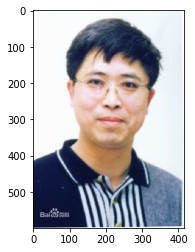

In [9]:
img1path = 'trainset/0001/0001_0000255/0001_0000255_script.jpg'
img2path = 'train/0001_0000255/1.jpg'
plt.imshow(mpimg.imread(img1path))
print('[INFO] RAW IMAGE')

[INFO] CROPPED IMAGE


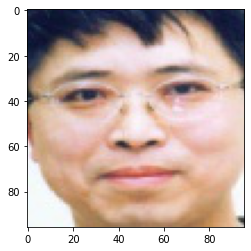

In [10]:
plt.imshow(mpimg.imread(img2path))
print('[INFO] CROPPED IMAGE')

[INFO] RAW IMAGE


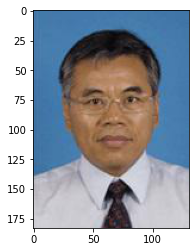

In [11]:
img1path = 'trainset/0001/0001_0000292/0001_0000292_script.jpg'
img2path = 'train/0001_0000292/1.jpg'
plt.imshow(mpimg.imread(img1path))
print('[INFO] RAW IMAGE')

[INFO] CROPPED IMAGE


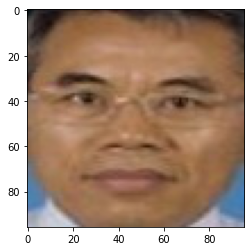

In [12]:
plt.imshow(mpimg.imread(img2path))
print('[INFO] CROPPED IMAGE')